In [2]:
import h5py
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation
import os
import math
from pathlib import Path

os.environ['HDF5_USE_FILE_LOCKING'] = 'FALSE'

def GetSize(path):
    file = h5py.File(path, mode='r')
    n = file["times"].shape[0]
    file.close()
    return n

def Load(p, chunk=[]):
    # @brief Reads grid data and time data from a specified hdf5 file.
    # @param p The p of the HDF5 file
    # @param dataset A string name of the main dataset containing the states data
    # @param times A string name of the time dataset containing all time points
    # @param chunk An optional [start, end] list that specifies how many time steps to load
    file = h5py.File(p, "r")
    if chunk:
        data_array = np.array(file['data'][chunk[0]:chunk[1],:,:])
        time_array = np.array(file['times'][chunk[0]:chunk[1]])
    else:
        data_array = np.array(file['data'])
        time_array = np.array(file['times'])
    file.close()
    return (data_array, time_array)

home = '/srv/public/Maikel'
fvs = '{}/FiniteVolumeSolver/'.format(home)
build = '{}/build_2D-Release/'.format(fvs)

# perfect_path = '{}/PerfectGas1d_cfl05.h5'.format(build)
# perfect10_path = '{}/PerfectGas1d_cfl10.h5'.format(build)
# prim_path = '{}/IdealGasMix_Prim.h5'.format(build)
consm_path = '{}/ConservativeM.h5'.format(build)
cons_path = '{}/Conservative.h5'.format(build)
hllem_path = '{}/HLLEM.h5'.format(build)
hlle_path = '{}/HLLE.h5'.format(build)
char_path = '{}/Characteristics.h5'.format(build)
char2_path = '{}/Characteristics2.h5'.format(build)
char3_path = '{}/Characteristics3.h5'.format(build)
ref_path = '{}/solution.txt'.format(build)

ref_data = np.loadtxt(ref_path)

# perf_data, _ = Load(perfect_path)
# perf10_data, _ = Load(perfect10_path)
# prim_data, times = Load(prim_path)
cons_data, _ = Load(cons_path)
consm_data, _ = Load(consm_path)
char_data, _ = Load(char_path)
char2_data, _ = Load(char2_path)
char3_data, _ = Load(char3_path)
hlle_data, _ = Load(hlle_path)
hllem_data, _ = Load(hllem_path)
rhofile = h5py.File('{}/rho_005.h5'.format(home), 'r') 
klein_data = np.array(rhofile['Data-Set-2'][2:102])
rhofile.close()


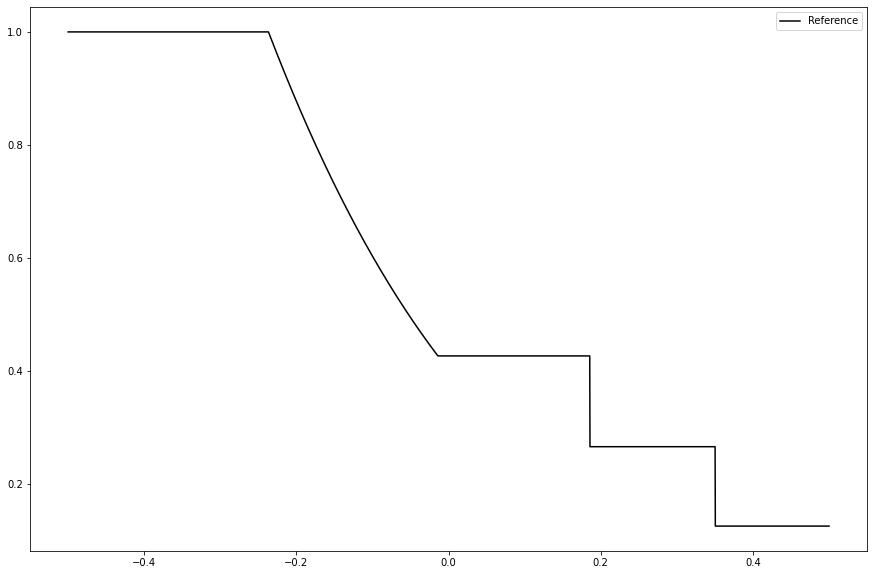

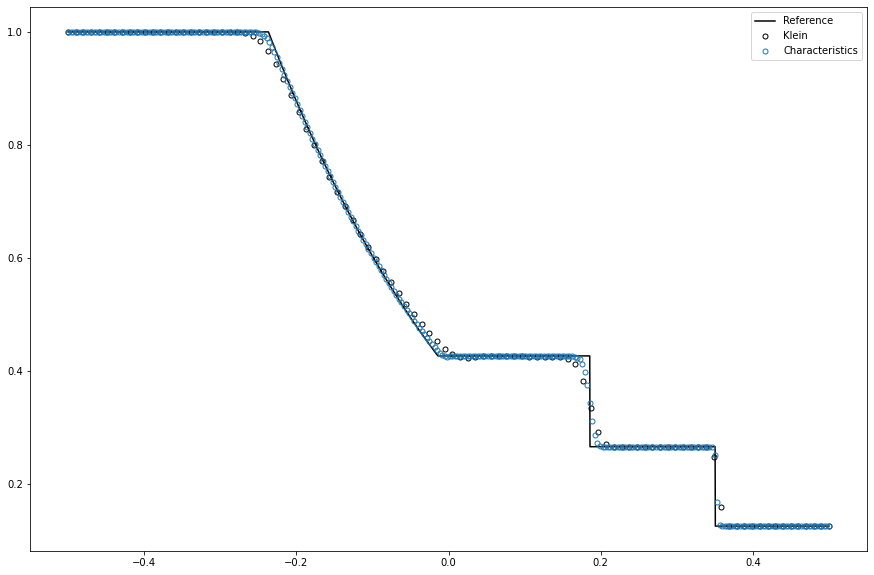

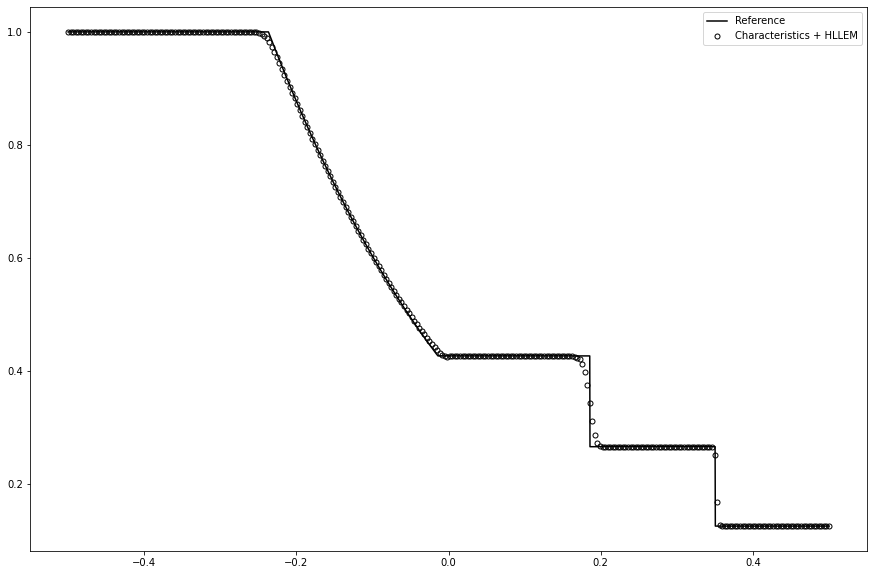

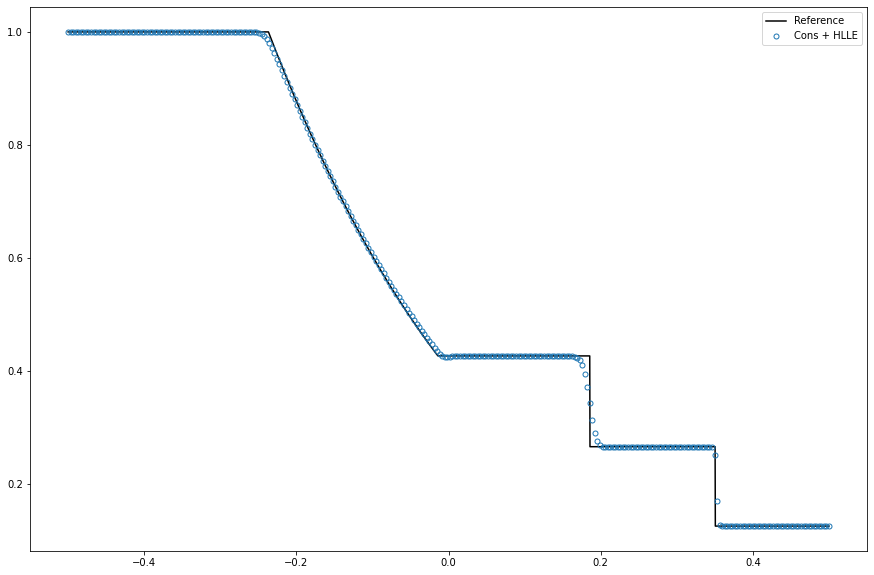

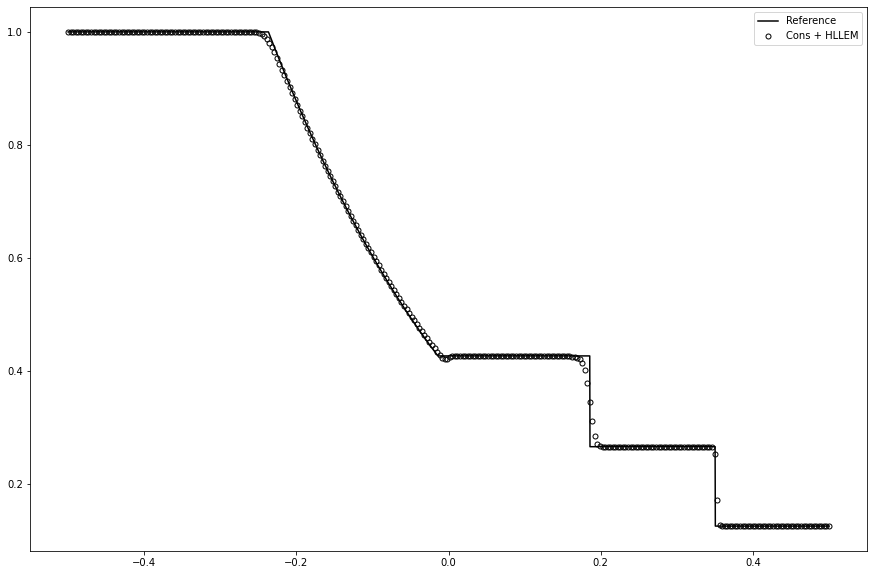

In [4]:
var = 0
# i_perf = perf_data.shape[0] - 1


marker_style = dict(color='black', linestyle='none', marker='o',
                    markersize=5, markerfacecoloralt='tab:red')

marker_style2 = dict(color='tab:blue', linestyle='none', marker='o',
                    markersize=5, markerfacecoloralt='tab:red')

f = plt.figure(figsize=(15, 10))
# perf_x = np.linspace(-0.5, 0.5, perf_q.shape[0])
# plt.plot(perf_x, perf_q, "o", label='Perfect Gas (CFL 0.5)')

#perf10_x = np.linspace(-0.5, 0.5, perf10_q.shape[0])
#plt.plot(perf10_x, perf10_q, "go", label='Perfect Gas (CFL 1.0)')

# prim_x = np.linspace(-1.0, 1.0, prim_q.shape[0])
# plt.plot(prim_x, prim_q, "r-", label='Prim')

# i_cons = cons_data.shape[0] - 1
# cons_q = cons_data[i_cons, var, :, 0]
# cons_x = np.linspace(-0.5, 0.5, cons_q.shape[0])
# plt.plot(cons_x, cons_q, "go", label='Cons', fillstyle='none', **marker_style)

i_ref = ref_data.shape[0] - 1
ref_q = ref_data[:, 0]
ref_x = np.linspace(-0.5, 0.5, ref_q.shape[0])
plt.plot(ref_x, ref_q, "k-", label='Exact Solution')

plt.legend()
plt.show()

f = plt.figure(figsize=(15, 10))

i_ref = ref_data.shape[0] - 1
ref_q = ref_data[:, 0]
ref_x = np.linspace(-0.5, 0.5, ref_q.shape[0])
plt.plot(ref_x, ref_q, "k-", label='Exact Solution')

i_klein = klein_data.shape[0] - 1
klein_q = klein_data[:]
klein_x = np.linspace(-0.5, 0.5, klein_q.shape[0])
plt.plot(klein_x, klein_q, "g--", label='Klein', fillstyle='none', **marker_style)

i_char3 = char3_data.shape[0] - 1
char3_q = char3_data[i_char3, var, :, 0]
char3_x = np.linspace(-0.5, 0.5, char3_q.shape[0])
plt.plot(char3_x, char3_q, "g--", label='Characteristics', fillstyle='none', **marker_style2)

plt.legend()
plt.show()
f = plt.figure(figsize=(15, 10))

i_ref = ref_data.shape[0] - 1
ref_q = ref_data[:, 0]
ref_x = np.linspace(-0.5, 0.5, ref_q.shape[0])
plt.plot(ref_x, ref_q, "k-", label='Exact Solution')

i_char3 = char3_data.shape[0] - 1
char3_q = char3_data[i_char3, var, :, 0]
char3_x = np.linspace(-0.5, 0.5, char3_q.shape[0])
plt.plot(char3_x, char3_q, "g--", label='Characteristics + HLLEM', fillstyle='none', **marker_style)


# ref_x = np.linspace(-0.5, 0.5, ref.shape[0])
# plt.plot(ref_x, ref, label="Klein's Exact Solution (CFL 1.0)", fillstyle='none', **marker_style)

# i_hlle = hlle_data.shape[0] - 1
# hlle_q = hlle_data[i_hlle, var, :, 0]
# hlle_x = np.linspace(-0.5, 0.5, hlle_q.shape[0])
# plt.plot(hlle_x, hlle_q, label='HLLE')#, fillstyle='none', **marker_style)

# i_hllem = hllem_data.shape[0] - 1
# hllem_q = hllem_data[i_hllem, var, :, 0]
# hllem_x = np.linspace(-0.5, 0.5, hllem_q.shape[0])
# plt.plot(hllem_x, hllem_q, label='HLLEM')#, fillstyle='none', **marker_style2)


plt.legend()
plt.show()

f = plt.figure(figsize=(15, 10))

i_ref = ref_data.shape[0] - 1
ref_q = ref_data[:, 0]
ref_x = np.linspace(-0.5, 0.5, ref_q.shape[0])
plt.plot(ref_x, ref_q, "k-", label='Exact Solution')

i_cons = cons_data.shape[0] - 1
cons_q = cons_data[i_cons, var, :, 0]
cons_x = np.linspace(-0.5, 0.5, cons_q.shape[0])
plt.plot(cons_x, cons_q,  label='Cons + HLLE', fillstyle='none', **marker_style2)

# i_consm = consm_data.shape[0] - 1
# consm_q = consm_data[i_consm, var, :, 0]
# consm_x = np.linspace(-0.5, 0.5, consm_q.shape[0])
# plt.plot(consm_x, consm_q,  label='Cons', fillstyle='none', **marker_style2)

plt.legend()
plt.show()

f = plt.figure(figsize=(15, 10))

i_ref = ref_data.shape[0] - 1
ref_q = ref_data[:, 0]
ref_x = np.linspace(-0.5, 0.5, ref_q.shape[0])
plt.plot(ref_x, ref_q, "k-", label='Reference')

# i_cons = cons_data.shape[0] - 1
# cons_q = cons_data[i_cons, var, :, 0]
# cons_x = np.linspace(-0.5, 0.5, cons_q.shape[0])
# plt.plot(cons_x, cons_q,  label='Cons', fillstyle='none', **marker_style2)

i_consm = consm_data.shape[0] - 1
consm_q = consm_data[i_consm, var, :, 0]
consm_x = np.linspace(-0.5, 0.5, consm_q.shape[0])
plt.plot(consm_x, consm_q,  label='Cons + HLLEM', fillstyle='none', **marker_style)

plt.legend()
plt.show()

(3200, 2)